<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv') #reading the csv
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: printing the shape of the of the movies dataframe
movies.shape 

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer: printing the types of the columns
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer: calculating the mean of the duration column
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer: 
movies.loc[:,'duration'].agg(['min','max'])

min     64
max    242
Name: duration, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

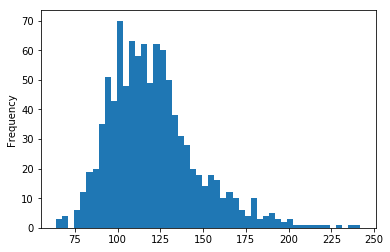

In [8]:
# Answer:
movies.loc[:,'duration'].plot(kind='hist', bins=50);

#### Use a box plot to display that same data.

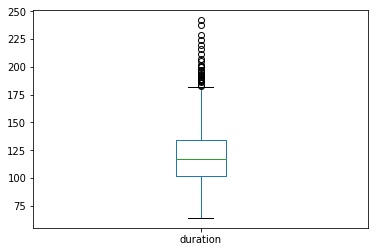

In [9]:
# Answer:
movies.loc[:,'duration'].plot(kind ='box');

## Intermediate level

In [10]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Count how many movies have each of the content ratings.

In [11]:
# Answer: split the content_rating column and calculate the value_counts
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

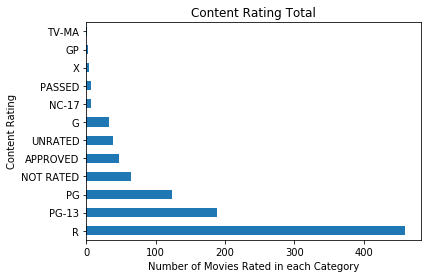

In [12]:
# Answer:
content_rating_plot = movies.loc[:,'content_rating'].value_counts().plot(kind='barh')
content_rating_plot.set_title('Content Rating Total')
content_rating_plot.set_ylabel('Content Rating')
content_rating_plot.set_xlabel('Number of Movies Rated in each Category');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [13]:
# Answer:
movies.loc[:,'content_rating'].replace(to_replace=['NOT RATED', 'APPROVED', 'PASSED', 'GP'],value='UNRATED',inplace=True)
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:
movies.loc[:,'content_rating'].replace(value='NC-17',to_replace=['X','TV-MA'],inplace=True)
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [15]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [16]:
movies[movies['content_rating'].isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# Answer:
movies.loc[:,'content_rating'].fillna(value='PG-13',inplace=True)
movies.loc[:,'content_rating'].isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [18]:
movies.loc[movies['duration']>=120].mean()

star_rating      7.948899
duration       142.458150
dtype: float64

In [19]:
movies.loc[movies['duration']<120].mean()

star_rating      7.838667
duration       102.405714
dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

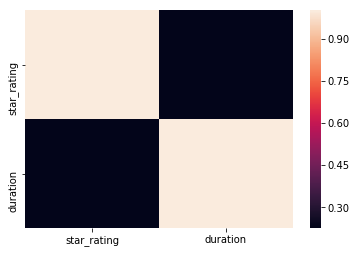

In [20]:
# Answer:
sns.heatmap(movies.corr());

#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies.loc[:,'genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [22]:
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      192
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

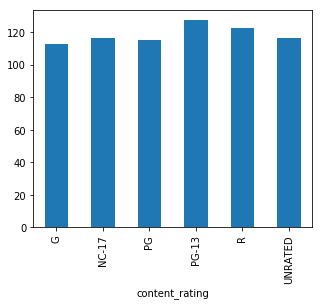

In [37]:
movies.groupby('content_rating')['duration'].mean().plot(kind='bar',x='content_rating',y='duration',figsize=(5,4));

#### Determine the top rated movie (by star rating) for each genre.

In [24]:
# Answer:
movies.groupby('genre')['star_rating','title'].max()

,star_rating,title
genre,,
Action,9.0,Yojimbo
Adventure,8.9,True Grit
Animation,8.6,Wreck-It Ralph
Biography,8.9,Walk the Line
Comedy,8.6,Zombieland
Crime,9.3,Zodiac
Drama,8.9,Zulu
Family,7.9,Willy Wonka & the Chocolate Factory
Fantasy,7.7,The City of Lost Children


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [25]:
# Answer: The duplicate values are not actually duplicates 
movies.loc[movies['title'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 1: manually create a list of relevant genres, then filter using that list

In [26]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [27]:
# I FEEL LIKE I'M CLOSE TO A ONE-LINE SOLUTION, BUT COULDN'T SOLVE IT
# movies.groupby('genre', by = (movies.loc[:,'genre'].value_counts()>10))['star_rating'].mean()

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [28]:
# Answer:
genre_means = movies.groupby('genre')['star_rating'].mean()
greater_than_10 = movies.loc[:,'genre'].value_counts()>10
combined = pd.concat([genre_means,greater_than_10],axis=1)
combined.head()

,star_rating,genre
Action,7.884559,True
Adventure,7.933333,True
Animation,7.914516,True
Biography,7.862338,True
Comedy,7.822436,True


In [29]:
combined.sort_values(by='genre',ascending=False).head(8)

,star_rating,genre
Action,7.884559,True
Adventure,7.933333,True
Animation,7.914516,True
Biography,7.862338,True
Comedy,7.822436,True
Crime,7.916935,True
Drama,7.902518,True
Horror,7.806897,True


#### Option 4: aggregate by count and mean, then filter using the count

In [30]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [74]:
cols = ['actors_list']
movies[cols] = movies[cols].replace({'u':''},regex=True) #cleaned actors_list
morgan_freeman = movies.loc[:,'actors_list'].str.contains('Morgan Freeman')
movie_ratings = movies.loc[:,'star_rating']
new_df = pd.concat([morgan_freeman,movie_ratings],axis=1)
new_df.sort_values(by='actors_list',ascending=False).head(8)

,actors_list,star_rating
0,True,9.3
119,True,8.3
943,True,7.4
24,True,8.7
227,True,8.1
621,True,7.7
962,True,7.4
549,True,7.8
